# 데이터 전처리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib as mpl
mpl.rc('font', family="Malgun Gothic")

from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
from sklearn.model_selection import train_test_split

In [3]:
def preprocessing(df_scaling, scaled_form = 'MinMaxScaler()'):
    # 불필요한 컬럼 제거
    if 'ID' in df_scaling:
        df_scaling = df_scaling.drop("ID", axis = 1)
        if len(df_scaling.columns) == 1:
            return df_scaling
        
        df_scaling = df_scaling.drop('oral', axis = 1) 
        # 범주형 피처 레이블 인코딩 
        cate_features = df_scaling[['gender','tartar']]

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["gender"])
        df_scaling["gender"] = lbe.fit_transform(df_scaling["gender"])

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["tartar"])
        df_scaling["tartar"] = lbe.fit_transform(df_scaling["tartar"])

        # 정규화 작업
        cate_features = df_scaling[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
        scaled_features = df_scaling.drop(cate_features.columns, axis=1)
        if scaled_form == 'StandardScaler()':
            # Standard scaler
            scaler = StandardScaler()
            scaler.fit(scaled_features)
            scaled = scaler.transform(scaled_features)
            standard_scaled = pd.DataFrame(scaled,columns = scaled_features.columns)
            standard_scaled[cate_features.columns] = cate_features

            return standard_scaled
        else:
            # MinMax scaler
            scaler_M = MinMaxScaler()
            scaler_M.fit(scaled_features)
            scaled_M = scaler_M.transform(scaled_features)
            min_max_scaled = pd.DataFrame(scaled_M,columns = scaled_features.columns)
            min_max_scaled[cate_features.columns] = cate_features

            return min_max_scaled

In [6]:
smoking = pd.read_csv('./data/Smoking_raw/smoking.csv')
smoking.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [7]:
scaled_data = preprocessing(smoking)
scaled_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,serum creatinine,AST,ALT,Gtp,smoking,gender,tartar,hearing(right),hearing(left),dental caries
0,0.307692,0.416667,0.285714,0.388462,0.112245,0.091837,0.254438,0.311321,0.104575,0.410256,...,0.052174,0.009195,0.006179,0.026052,0.0,0,1,1.0,1.0,0
1,0.307692,0.500000,0.285714,0.384615,0.071429,0.051020,0.284024,0.283019,0.183007,0.351282,...,0.043478,0.012261,0.006179,0.017034,0.0,0,1,1.0,1.0,0
2,0.538462,0.666667,0.285714,0.371795,0.071429,0.071429,0.396450,0.433962,0.093682,0.479487,...,0.078261,0.011494,0.005149,0.021042,1.0,1,0,1.0,1.0,0
3,0.307692,0.583333,0.380952,0.474359,0.142857,0.142857,0.171598,0.188679,0.108932,0.684615,...,0.078261,0.009962,0.008582,0.017034,0.0,1,1,1.0,1.0,0
4,0.307692,0.416667,0.285714,0.448718,0.091837,0.091837,0.289941,0.320755,0.074074,0.330769,...,0.043478,0.007663,0.004463,0.021042,0.0,0,0,1.0,1.0,0


In [5]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [6]:
# smoking = pd.read_csv("./data/smoking.csv")
# df = smoking.drop("ID", axis = 1)
# df.head()

In [7]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  55692 non-null  float64
 1   height(cm)           55692 non-null  float64
 2   weight(kg)           55692 non-null  float64
 3   waist(cm)            55692 non-null  float64
 4   eyesight(left)       55692 non-null  float64
 5   eyesight(right)      55692 non-null  float64
 6   systolic             55692 non-null  float64
 7   relaxation           55692 non-null  float64
 8   fasting blood sugar  55692 non-null  float64
 9   Cholesterol          55692 non-null  float64
 10  triglyceride         55692 non-null  float64
 11  HDL                  55692 non-null  float64
 12  LDL                  55692 non-null  float64
 13  hemoglobin           55692 non-null  float64
 14  Urine protein        55692 non-null  float64
 15  serum creatinine     55692 non-null 

In [8]:
target = scaled_data['smoking']
target

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
55687    0.0
55688    0.0
55689    0.0
55690    0.0
55691    1.0
Name: smoking, Length: 55692, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, target, test_size = 0.1, random_state=0)

# 데이터 시각화 및 분석
- 데이터 세트의 성별 및 흡연 비율 시각화 (파이)
- 혈관 및 호흡 / 신장 질환 / 간수치 / 구강건강 별 시각화 (히스토그램)
    - 각 해당 히트맵을 통한 흡연과의 상관성 파악

<AxesSubplot:ylabel='smoking'>

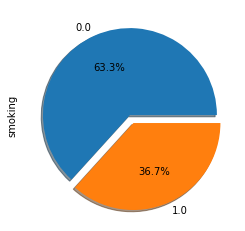

In [11]:
# 데이터 세트에서 흡연 비율
scaled_data['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

# Non-smoking = 63.3%
# Smoking =36.7 %
# 비흡연자 > 흡연자

gender          F         M
smoking                    
0        0.551466  0.448534
1        0.041995  0.958005


Text(0.5, 1.0, 'Gender')

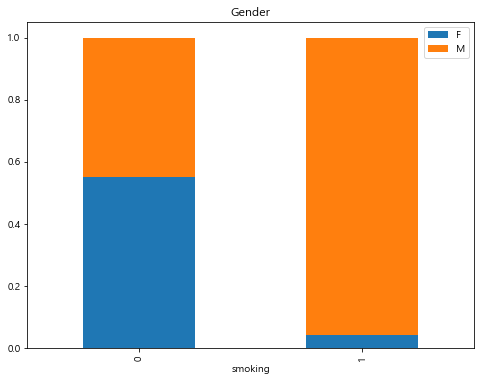

In [102]:
# 비흡연자(0)와 흡연자(1)의 성별 비율

ex3 = smoking.groupby('smoking')['gender'].value_counts(normalize=True).unstack()
print(ex3)
ex3.plot.bar(stacked=True,figsize=(8,6))
plt.legend(loc='upper right')
plt.title('Gender')

# 비흡연자 : 여성 > 남성
# 흡연자 : 여성 < 남성

array([[<AxesSubplot:title={'center':'systolic'}>,
        <AxesSubplot:title={'center':'relaxation'}>,
        <AxesSubplot:title={'center':'fasting blood sugar'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'triglyceride'}>,
        <AxesSubplot:title={'center':'HDL'}>],
       [<AxesSubplot:title={'center':'LDL'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'smoking'}>]], dtype=object)

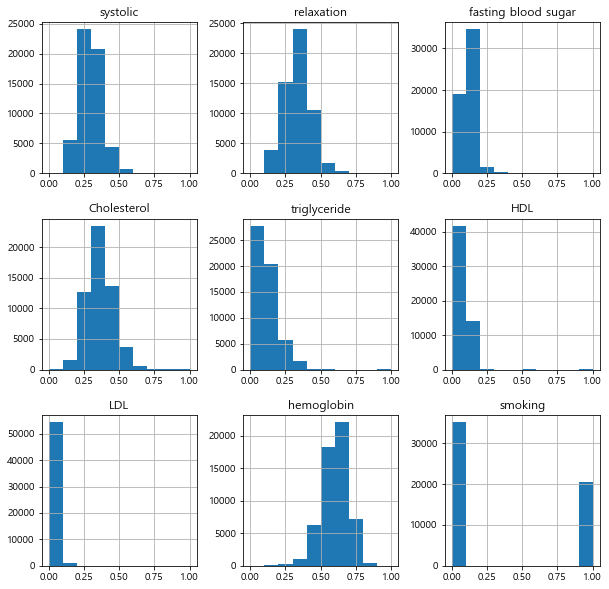

In [9]:
# 혈관 및 호흡
scaled_data1 = scaled_data[['systolic','relaxation','fasting blood sugar',
                            'Cholesterol','triglyceride','HDL','LDL','hemoglobin','smoking']]
scaled_data1.hist(figsize=(10,10))

In [13]:
scaled_data1.corr().style.background_gradient(cmap = "magma")
# 흡연과 가장 상관관계가 있는 부분은 hemoglobin 이다.

,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,smoking
systolic,1.000000,0.761051,0.172700,0.059572,0.198826,-0.088487,0.016569,0.186514,0.073109
relaxation,0.761051,1.000000,0.147879,0.095357,0.215541,-0.089410,0.041017,0.232899,0.108309
fasting blood sugar,0.172700,0.147879,1.000000,0.009903,0.227746,-0.121274,-0.019615,0.099921,0.100279
Cholesterol,0.059572,0.095357,0.009903,1.000000,0.247581,0.168623,0.738975,0.061503,-0.028548
triglyceride,0.198826,0.215541,0.227746,0.247581,1.000000,-0.411752,0.025739,0.273353,0.251799
HDL,-0.088487,-0.089410,-0.121274,0.168623,-0.411752,1.000000,-0.056398,-0.240095,-0.178470
LDL,0.016569,0.041017,-0.019615,0.738975,0.025739,-0.056398,1.000000,0.052903,-0.045220
hemoglobin,0.186514,0.232899,0.099921,0.061503,0.273353,-0.240095,0.052903,1.000000,0.400678
smoking,0.073109,0.108309,0.100279,-0.028548,0.251799,-0.178470,-0.045220,0.400678,1.000000


In [10]:
from scipy import stats

In [21]:
b=['1' if i==1 else '0' for i in scaled_data1['smoking']]

In [22]:
b

['0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1'

In [12]:
a=stats.mstats.pointbiserialr(scaled_data1['hemoglobin'],scaled_data1['smoking'])

In [23]:
a=scaled_data1['hemoglobin'].values
#b=scaled_data1['smoking'].values
stats.mstats.pointbiserialr(a,b)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<AxesSubplot:xlabel='smoking', ylabel='hemoglobin'>

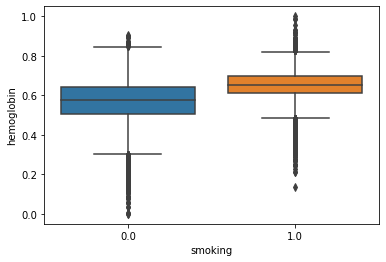

In [27]:
sns.boxplot(data=scaled_data,x='smoking',y='hemoglobin')
# 흡연과 hemoglobin의 상관계수가 0.4로 흡연 여부가 1일수록 헤모글로빈이 높아짐을 확인 할 수 있다. 

<AxesSubplot:xlabel='smoking', ylabel='triglyceride'>

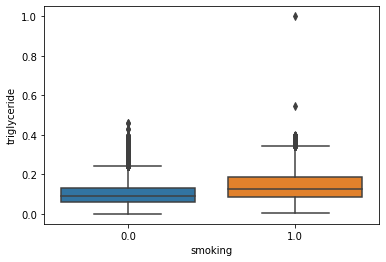

In [33]:
sns.boxplot(data=scaled_data,x='smoking',y='triglyceride')
# 흡연과 triglyceride의 상관계수가 0.25로 흡연 여부가 1일수록 triglyceride이 높아짐을 확인 할 수 있다. 

<AxesSubplot:xlabel='smoking', ylabel='HDL'>

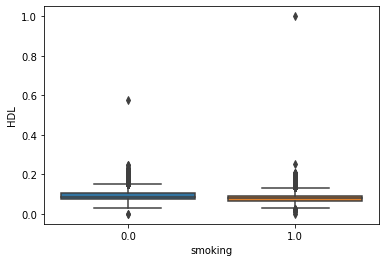

In [37]:
sns.boxplot(data=scaled_data,x='smoking',y='HDL')
# 흡연과 HDL의 상관계수가 -0.17로 흡연 여부가 1일수록 HDL이 낮아짐을 확인 할 수 있다. 

array([[<AxesSubplot:title={'center':'Urine protein'}>,
        <AxesSubplot:title={'center':'serum creatinine'}>],
       [<AxesSubplot:title={'center':'smoking'}>, <AxesSubplot:>]],
      dtype=object)

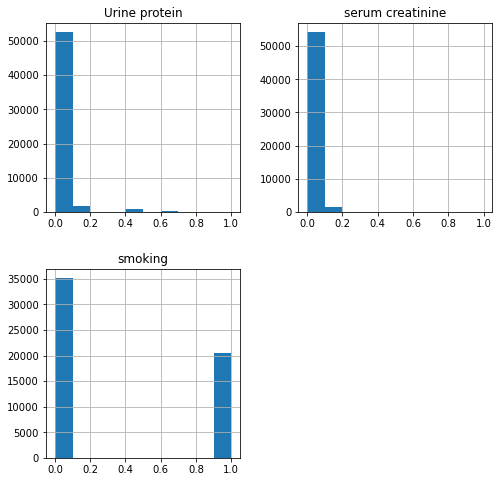

In [14]:
# 신장질환
scaled_data2 = scaled_data[['Urine protein','serum creatinine','smoking']]
scaled_data2.hist(figsize=(8,8))

In [15]:
scaled_data2.corr().style.background_gradient(cmap = "magma")
# Urine protein, serum creatinine 와 smoking 은 큰 상관성을 가지고 있지 않음

,Urine protein,serum creatinine,smoking
Urine protein,1.000000,0.087682,0.014267
serum creatinine,0.087682,1.000000,0.216812
smoking,0.014267,0.216812,1.000000


<AxesSubplot:xlabel='smoking', ylabel='serum creatinine'>

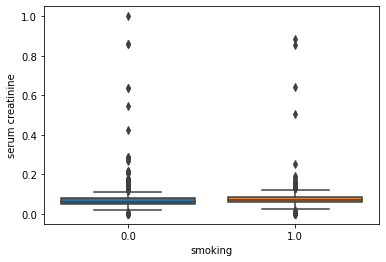

In [28]:
sns.boxplot(data=scaled_data,x='smoking',y='serum creatinine')
# 흡연과 serum creatinine의 상관계수가 0.21로 흡연 여부가 1일수록 serum creatinine이 높아짐을 확인 할 수 있다. 

array([[<AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'ALT'}>],
       [<AxesSubplot:title={'center':'Gtp'}>,
        <AxesSubplot:title={'center':'smoking'}>]], dtype=object)

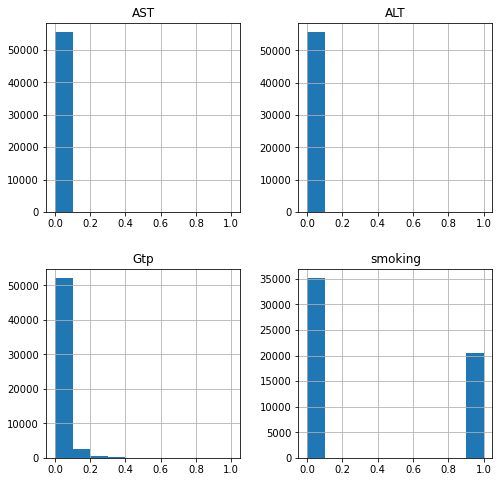

In [16]:
# 간수치 
scaled_data3 = scaled_data[['AST','ALT','Gtp','smoking']]
scaled_data3.hist(figsize=(8,8))

In [17]:
scaled_data3.corr().style.background_gradient(cmap = "magma")
# AST, ALT, Gtp 와 역시 큰 상관성이 없음 / Gtp

,AST,ALT,Gtp,smoking
AST,1.000000,0.740726,0.379959,0.059253
ALT,0.740726,1.000000,0.343934,0.097338
Gtp,0.379959,0.343934,1.000000,0.236619
smoking,0.059253,0.097338,0.236619,1.000000


<AxesSubplot:xlabel='smoking', ylabel='Gtp'>

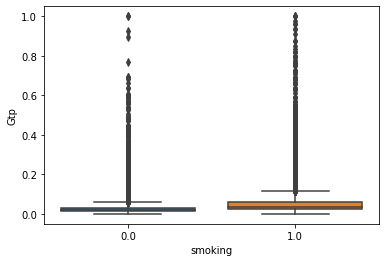

In [32]:
sns.boxplot(data=scaled_data,x='smoking',y='Gtp')
# 흡연과 Gtp의 상관계수가 0.23으로 흡연 여부가 1일수록 Gtp이 높아짐을 확인 할 수 있다. 

In [85]:
# 구강건강 (1)
smoke_dental = scaled_data.groupby("smoking")["dental caries"].value_counts(normalize=True)
pd.DataFrame(smoke_dental)
# smoke_dental.plot(kind='pie', explode=[0,0.1], autopct='%1.1f%%',shadow=True)
# 흡연자 중 충치가 있을 확률 : 59%
# 비흡연자 중 충치가 있을 확률 : 40% 

dental caries
smoking dental caries               
0.0     0                   0.819082
        1                   0.180918
1.0     0                   0.730824
        1                   0.269176

Text(0.5, 1.0, 'Dental Caries')

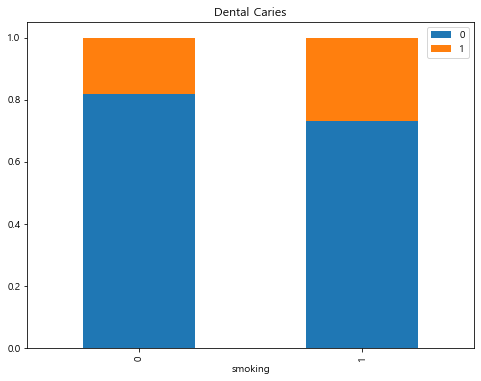

In [82]:
# 비흡연자 / 흡연자의 충치 비율 시각화
ex2=smoking.groupby('smoking')['dental caries'].value_counts(normalize=True).unstack()
ex2.plot.bar(stacked=True,figsize=(8,6))
plt.legend(loc='upper right')
plt.title('Dental Caries')

In [86]:
# 구강건강 (2)

smoke_tarter = scaled_data.groupby("smoking")['tartar'].value_counts(normalize=True)
pd.DataFrame(smoke_tarter)
# print(smoke_tarter)
# smoke_tarter.plot(kind='pie', explode=[0,0.1], autopct='%1.1f%%',shadow=True)
# # 흡연자 중 치석이 있을 확률 : 54%
# # 비흡연자 중 치석이 있을 확률 : 45% 

tartar
smoking tartar          
0.0     1       0.518205
        0       0.481795
1.0     1       0.619897
        0       0.380103

Text(0.5, 1.0, 'Tartar')

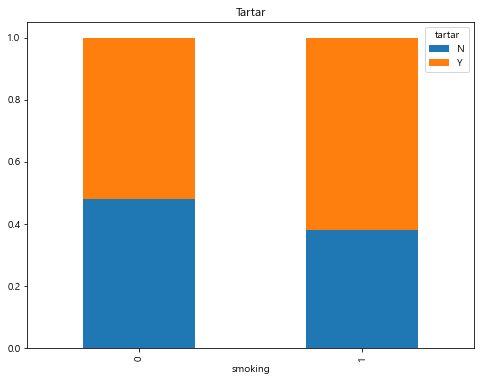

In [81]:
# 비흡연자 / 흡연자의 치석 비율 시각화
ex=smoking.groupby('smoking')['tartar'].value_counts(normalize=True).unstack()
ex.plot.bar(stacked=True,figsize=(8,6))
plt.title('Tartar')